## Проект по информатике (Набережная Елизавета, Обухова Анастасия, Гуменная Яна)

#  1. Kiva и ее деятельность
***


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva - это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva - **Make a loan, change a life**

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назанчений и стран, нуждающихся в финансировании можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с Сельским хозяйством, Питанием, Здоровьем и гигиеной, Розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала более 1 миллиарда долларов для 2 миллионов заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн. небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% - доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva - женщины
* Кредит Kiva финансируется каждые 2 минуты



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задачи
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь, конечно же, их интересуют не статистические показатели, а ощутимые выводы и рекомендации, которые позволят им работать эффективнее и больше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

#### Составим алгоритм данного исследования:
- Проверим, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям.
- Ознакомимся с датасетом, изучим его базовые характеристики, выявим первоначальные зависимости.
- Изучим основные демографические характеристики людей, которые используют Kiva. Поймем, из каких они регионов и стран, какова гендерная характеристика заемщиков.
- Посмотрим, для каких целей людям нужны средства и какие суммы они просят. Изучим сектора экономики, виды деятельности и сделаем выводы о том, как обстоят дела в каждом из них.
- Проанализируем, как долго заемщикам приходится ждать полного финансирования заявки.
- Попробуем изучить природу зависимости времени, требуемого на погашение ссуды и суммы кредита.
- Сформулируем основные выводы и визуальные материалы, подкрепляющие их.


## 1.4. Базы данных компании Kiva
***

**kiva_loans** - это набор данных, который содержит большую часть информации о займах:
- id - Уникальный идентификатор для кредита
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом заемщику (USD)
- sector - Сектор использования займа
- activity - Более гранулированная категория
- use - Назначение использования суммы кредита
- country_code - ISO код страны страны, в которой был выдан заем
- country - Полное название страны, в которой был выдан кредит
- posted_time - Время, в которое заявка была опубликована на Kiva
- disbursed_time - Время, когда кредитный агент выдал заемщику сумму
- funded_time - Время, когда заявка полностью финансируется кредиторами
- term_in_months - Срок, на который был выдан кредит в месяцах
- lender_count - Общее количество кредиторов, которые внесли свой вклад в этот кредит
- loaner_genders - Разделенные запятыми буквы M, F, где каждый экземпляр представляет одного мужчину / женщину в группе

**kiva_mpi_region_locations** - набор данных, содержащий данные о регинах и показатели MPI:
(Global Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше бедность в соответствующем регионе 
- country - страна
- region - регион в стране
- world_region - часть света
- MPI - многомерный индекс бедности
- geo - координаты (широта, долгота)



# 2. Разведочный анализ данных
***

## 2.1. Импорт данных и первое знакомство с датасетом
***
Датасеты:
*  df_mpi
*  df_kiva_loans 


Импортируем необходимые библиотеки и загрузим предоставленные наборы данных:

In [3]:
# Импорт библиотек

import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

import warnings
warnings.filterwarnings("ignore")  

In [4]:
df_kiva_loans = pd.read_csv("kiva_loans.csv", parse_dates=['posted_time', 'disbursed_time', 'funded_time'])
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных:

In [5]:
df_mpi.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [6]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


Посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе:

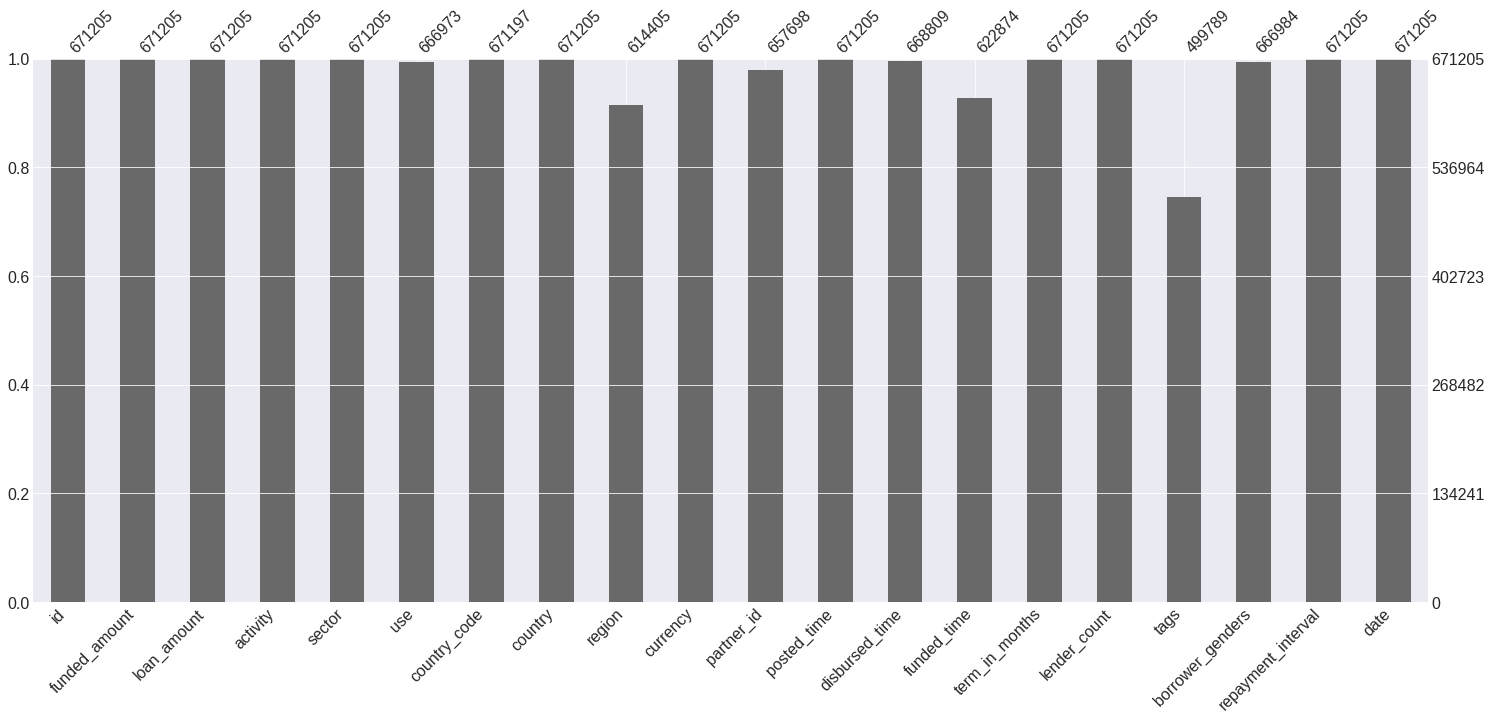

In [7]:
msno.bar(df_kiva_loans)

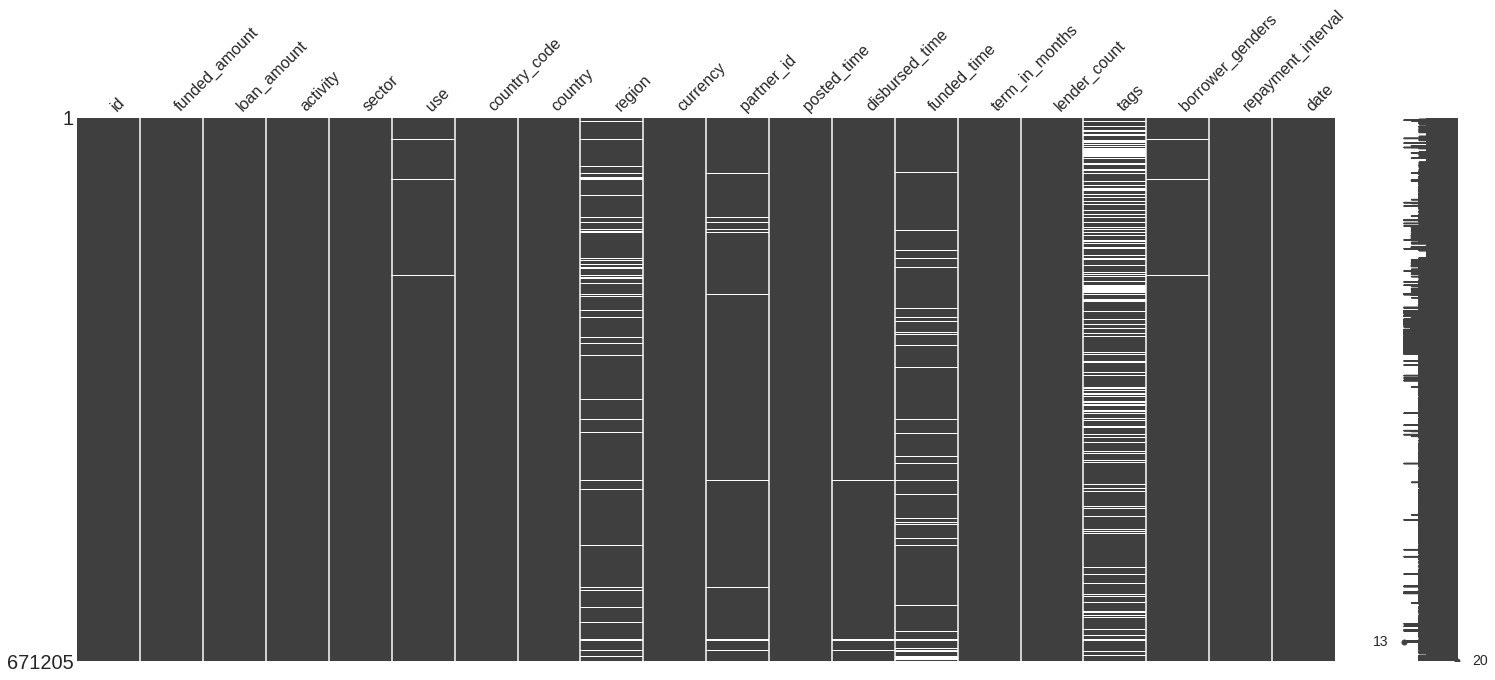

In [8]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе Kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [9]:
df_kiva_loans.dtypes

id                                  int64
funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
partner_id                        float64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                        int64
tags                               object
borrower_genders                   object
repayment_interval                 object
date                               object
dtype: object

In [10]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [11]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые можно сделать:**
* В этом датасете содержатся данные о **87** странах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **Сельское хозяйство**.
* Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита.
* В этом наборе данных **11298** разных значений пола! Очевидно, это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование - **450** долларов. Возможно это означает, что есть небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что еще более важно: есть только **1298** различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдается более **500** займов. Это дает нам четкое представление о том, насколько важна эта платформа и какое влияние она оказывает.


# 2.2. Пользователи Kiva

### 2.2.1. Из каких стран эти люди? 
Из исходного файла
***

Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva.


In [12]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [13]:
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

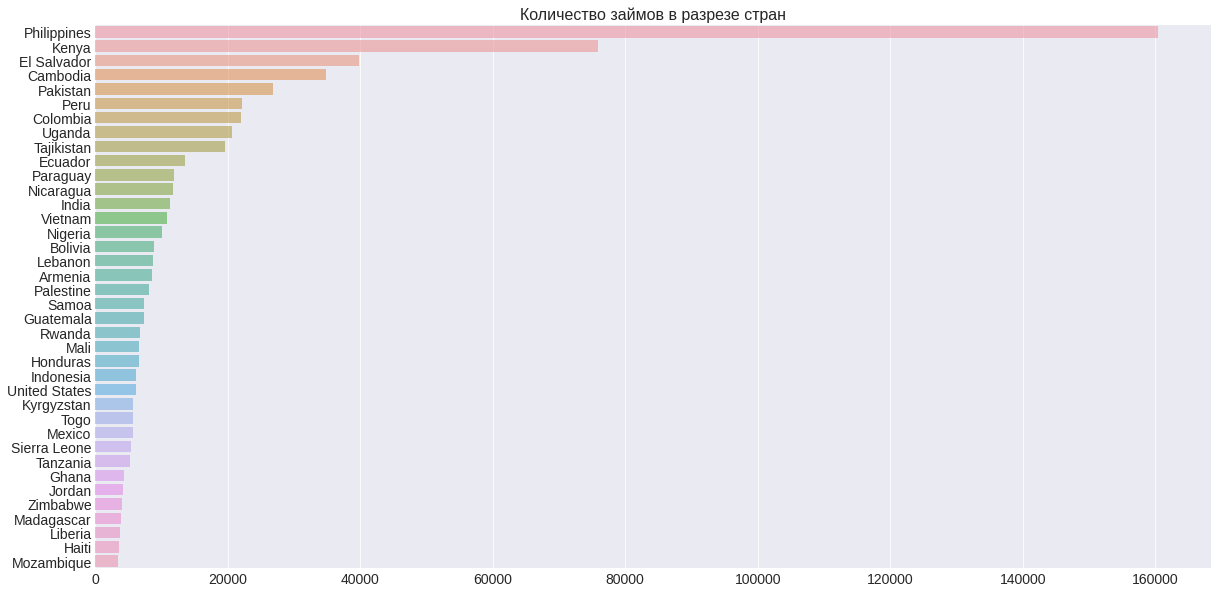

In [14]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов?**

Чуть менее четверти всех займов приходится на Филиппины.

Скорее всего, это связано с тем, что там широко распространены краткосрочные и небольшие займы.
Запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия может оказаться наиболее эффективной для точечного и обширного финансирования в условиях бедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Нет ни одной страны Европейского Союза. Удивительным стало присутствие США в этом списке, поскольку уровень бедности в США не такой, как в других странах. 

Попробуем сгруппировать страны по частям света

Для этого воспользуемся файлом **kiva_mpi_region_locations**

In [15]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [16]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [17]:
df_kiva_loans_world_region = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [18]:
regions = df_kiva_loans_world_region['world_region'].value_counts()

In [19]:
regions_list = regions.index.to_list()

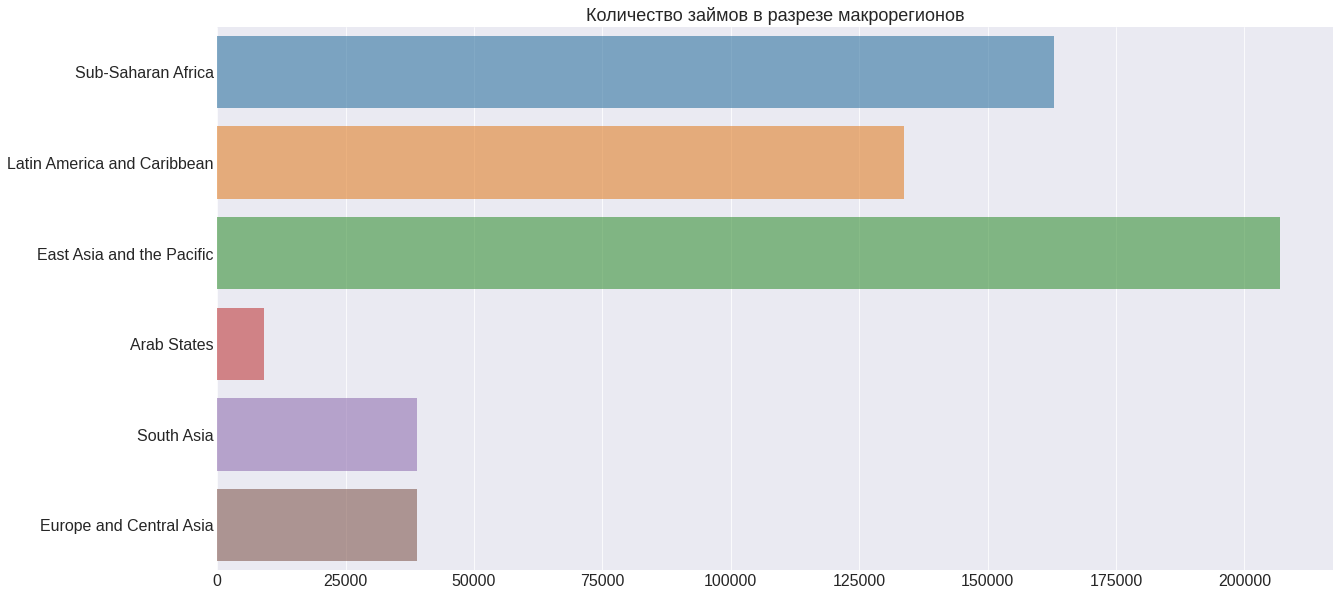

In [20]:
regions_mpi = df_mpi['world_region'].value_counts()
list_regions = list(regions_mpi.index)

plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, order = list_regions,  alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

Очевидным становится наличие 3-х лидеров и 3-х отстающих по количеству выданных займов

Исходя из этого, можно предположить, что в 3 регионах-отстающих либо нет острой потребности в присутствии Kiva (относительно богатые регионы), либо платфоома Kiva пока не набрала те обороты, что мы видим в 3 регионах-лидерах. Присутствие региона "Арабские страны" свидетельствует в пользу первого предположения.

### 2.2.2. Люди какого пола обращаются за финансированием?
***

In [21]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                          426502
male                                                                                                                                                                                                                            134710
female, female                                                                                                                                                                                                                   12164
female, female, female                                                                                                                                                                                                           11676
female, female, female, female                                              

Во многих займах, заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Давайте использовать метку **group** для этих заемщиков на круговой диаграмме.

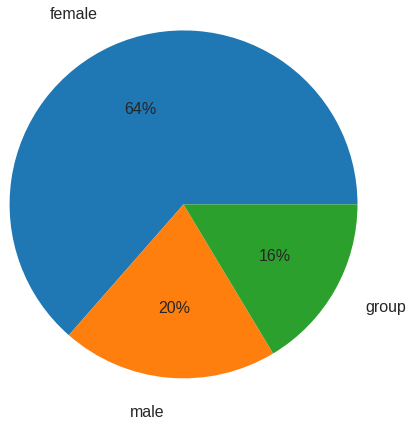

In [22]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заемщиков - женщины, это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

**В каких странах подавляющее большинство заемщиков - женщины?**

In [23]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

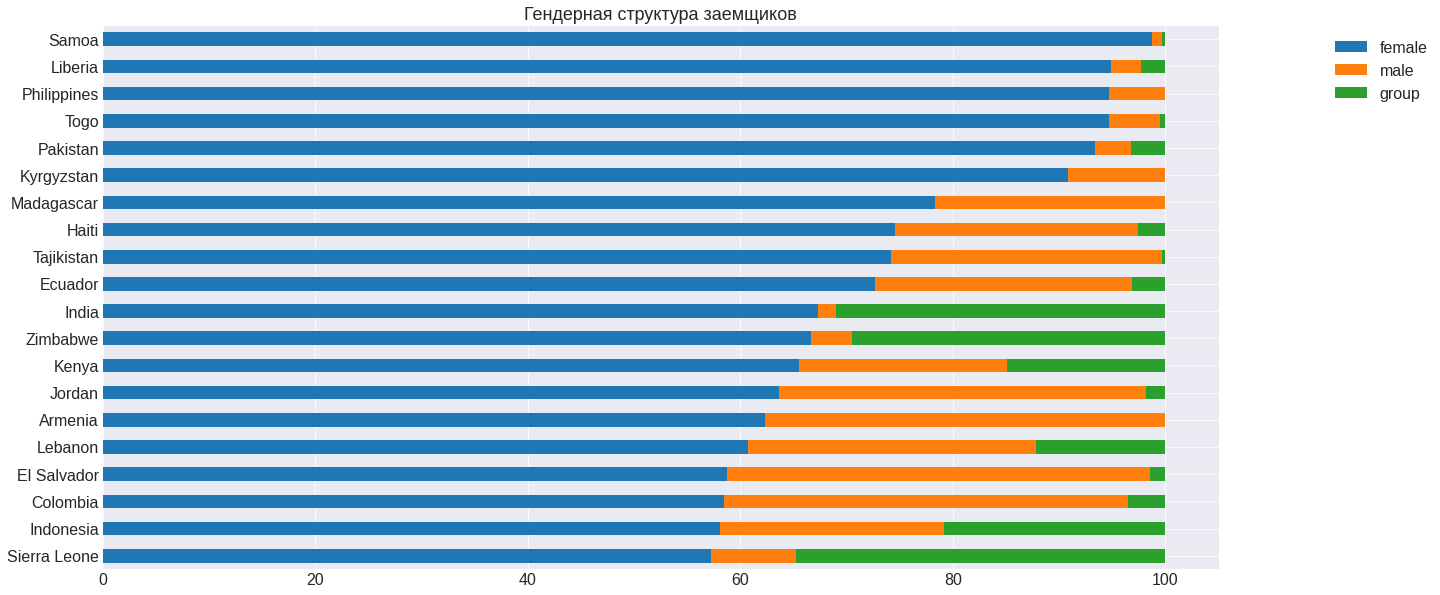

In [24]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре заемщиков в разрезе стран?**

Например, в связи с направлениями традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран с преобладающей религией Ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 
Kiva позволяет получать бОльшие возможности и перспективы в тех регионах, где ранее это было вряд ли доступно.

**В каких странах подавляющее большинство заемщиков - мужчины?**

In [25]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

df_male = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])

   
df_male = df_male[['male', 'female', 'group']]
df_male = df_male[(df_male['male'] >= df_male['female']) & (df_male['male'] >= df_male['group'])]
df_male

borrower_genders,male,female,group
country,,,
Mexico,34.767462,34.488765,30.743773
Uganda,48.701519,39.876705,11.421776
Palestine,64.601445,35.214889,0.183666
Nigeria,87.134964,11.986977,0.878058


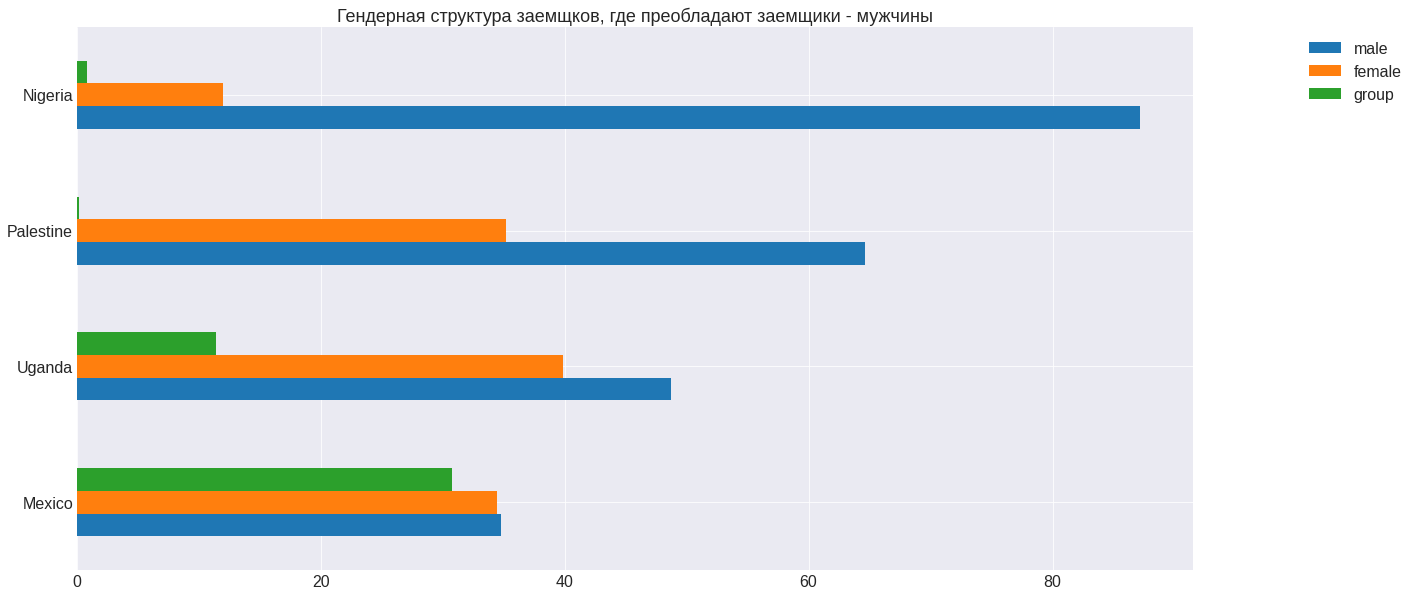

In [26]:
plot = df_male.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , title='Гендерная структура заемщков, где преобладают заемщики - мужчины'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

  **С чем может быть связана преобладающая доля мужчин в некоторых странах?**

Так как всего представлено 87 стран, 4 страны, с большинством заемщиков мужчин скорее исключениее, чем какая-то закономерность. 

Стоит так же отметить, что весомое преимущество заемщиков мужчин только в 2-х странах: **Нигерии** и **Палестине**.

Такое распределение может быть связано с сильным ущемеление женских прав, в частности решение мужчин о том, что женщина - "хранительница очага".

**В каких странах подавляющее большинство заемщиков - группы?**

In [27]:
df_group = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group', 'female'])

   
df_group = df_group[[ 'group', 'female', 'male']]
df_group = df_group[(df_group['group'] >= df_group['female']) & (df_group['group'] >= df_group['male'])]
df_group

borrower_genders,group,female,male
country,,,
Rwanda,42.746845,34.387528,22.865627
Paraguay,55.053348,25.817021,19.129631
Ghana,57.933242,25.971651,16.095107
Tanzania,59.149262,30.503928,10.346810
Guatemala,62.640219,17.045144,20.314637
Cambodia,73.682398,20.949592,5.368010
Mali,91.836120,3.328815,4.835066


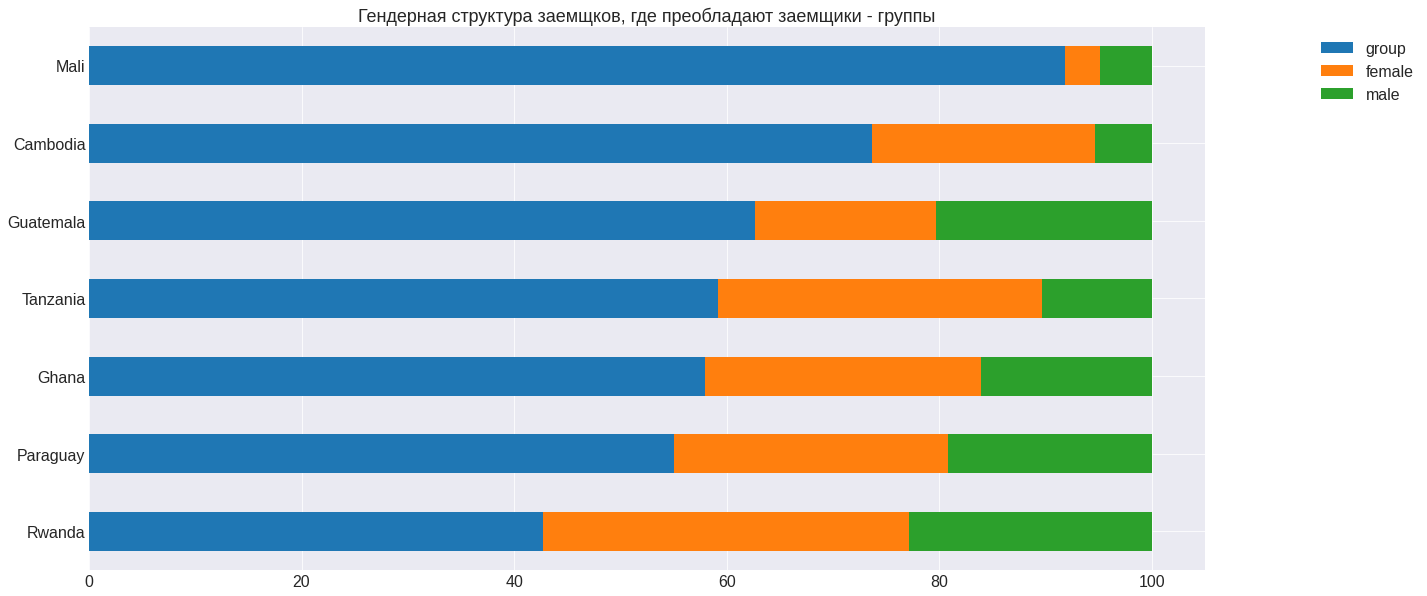

In [28]:
plot = df_group.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщков, где преобладают заемщики - группы'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [29]:
#посмотрим где находятся страны, чтобы лучше понять закономерности
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

    
df_group_merged = df_group.merge(df_mpi_grouped, on='country', how='left')
df_group_merged

,country,group,female,male,ISO,world_region,MPI
0,Rwanda,42.746845,34.387528,22.865627,RWA,Sub-Saharan Africa,0.242800
1,Paraguay,55.053348,25.817021,19.129631,NaN,NaN,NaN
2,Ghana,57.933242,25.971651,16.095107,GHA,Sub-Saharan Africa,0.183500
3,Tanzania,59.149262,30.503928,10.346810,NaN,NaN,NaN
4,Guatemala,62.640219,17.045144,20.314637,GTM,Latin America and Caribbean,0.113957
5,Cambodia,73.682398,20.949592,5.368010,KHM,East Asia and the Pacific,0.164053
6,Mali,91.836120,3.328815,4.835066,MLI,Sub-Saharan Africa,0.444833


  **С чем может быть связана преобладающая доля групп в некоторых странах?**

7 стран из 87 не дают нам понять общий тренд, а лишь выстроить план работы в данных странах.

Данные страны находятся рядом с экватором, возможно данные погодные условия, уровень жизни, уровень образованности влияют на умение кооперироваться или делают невозможным работу в одиночку.

### 2.2.3. Анализ зависимости пола заемщика от сектора экономики


In [30]:
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)
list_sectors

['Agriculture',
 'Arts',
 'Clothing',
 'Construction',
 'Education',
 'Entertainment',
 'Food',
 'Health',
 'Housing',
 'Manufacturing',
 'Personal Use',
 'Retail',
 'Services',
 'Transportation',
 'Wholesale']

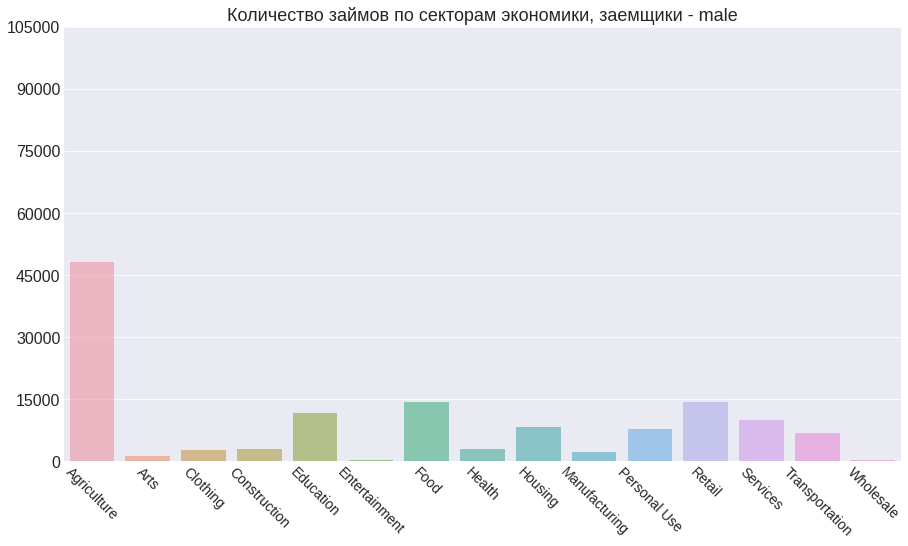

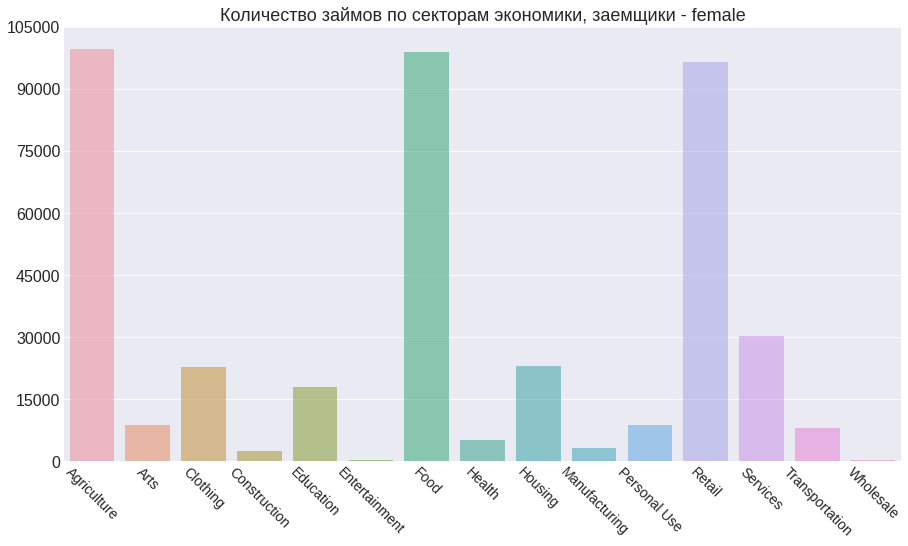

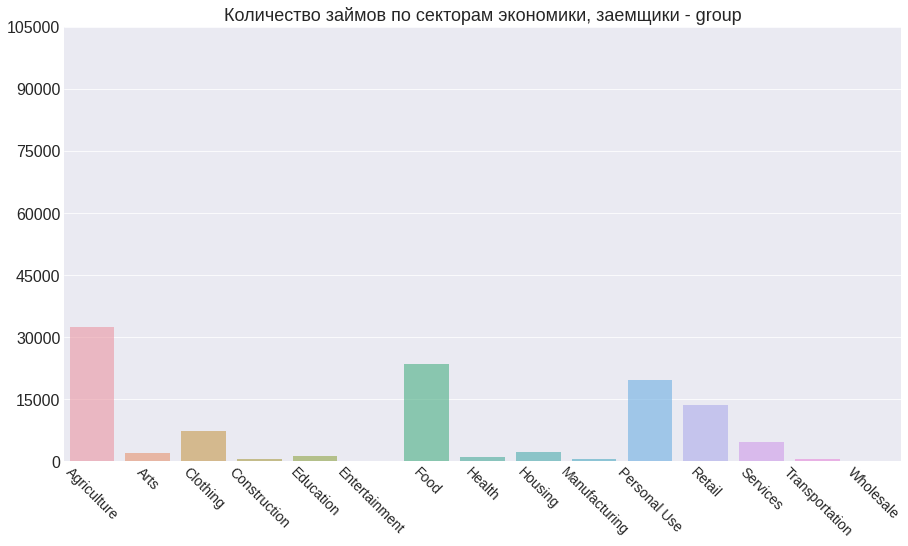

In [31]:
genders = ['male', 'female', 'group']
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)

data_female = df_kiva_loans[df_kiva_loans['borrower_genders'] == 'female']['sector'].value_counts()

for i, gender in enumerate(genders):
    
    plt.figure(figsize=(15,8))
    data = df_kiva_loans[df_kiva_loans['borrower_genders'] == gender]['sector'].value_counts()
    
        
    sns.barplot(x = data.index, y = data.values, order = list_sectors,  alpha=0.6)

    plt.title("Количество займов по секторам экономики, заемщики - " + str(gender), fontsize=18)
    plt.tick_params(axis = 'y', labelsize = 16)
    plt.tick_params(axis = 'x', rotation = - 45, labelsize = 14 )
    plt.yticks(list(range(0, data_female.max() + 10000, 15000)) )
    plt.show();


**Основные выводы: зависимость пола заемщика от сектора экономики**

**Заемщики - мужчины**

1. Их больше всего занимает область сельского хозяйства, которая является фаворитом с огромным отрывом. Это может быть связано со спецификой работы или они выбрали наиболее понятную область, через которую можно обеспечить свою семью необходимым.

2. Три выделяющихся сектора экономики - Ритейл, Еда, Образование
Два первых сектора в целом являются наиболее популярными. Наличие среднего количества заявок в секторе образование должно быть связано с кредитами на образовнаие свое или детей.


**Заемщики - женщины**

1. Сельское хозяйство, еда, ритейл - лидеры.

2. Заявок в секторах экономики Одежда и Искусство больше у девушек. Связано с тем, что темы являются более близкими для женщин.


**Заемщики - группы**

1. Лидеры - сельское хозяйство, еда и займы для персонального использования.

2. Количество займов для персонального использования много именно у групп, должно быть это связано с тем, что займы берут муж и жена, например, или родители и дети, соседи, для того, чтобы обеспечить свою семью чистой водой или санитарным туалетом. 